<a href="https://colab.research.google.com/github/HongWonSeok/STUDY/blob/main/%EB%AA%A8%EB%91%90%EC%9D%98_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EC%8B%9C%EC%A6%8C2_LAB_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**모두의 딥러닝 시즌2 with Pytorch - LAB 05**

**주제 - Logistic Regression**

**목차**
- Computing Hypothesis
- Computing Cost Function
- Evaluation
- Higher Implementaion

Logistic Regression

- Binary Classification

sigmoid 함수 = 1 / (1 + e ^(-x) )
sigmoid 함수를 쓰는이유 : sigmoid함수는 -무한대로 갈수록 0에 수렴하고 +무한대로 갈수록 1에 수렴하기 때문에 outlier에 영향을 받지 않는다.

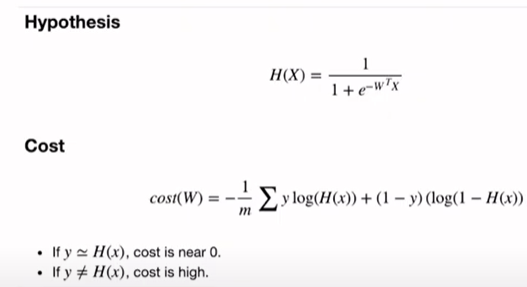

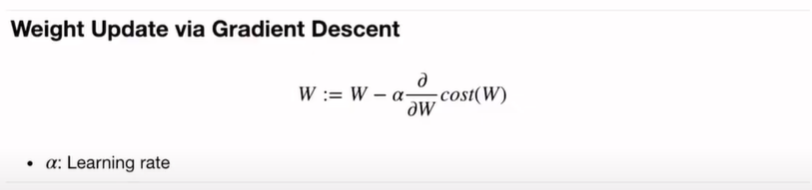

In [1]:
# import
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
torch.manual_seed(1) # 똫같이 결과를 재현해 주기위해서
# deep learning에서 random num을 사용하는 경우가 많다. (초기화를 할 때 주로 씀)
# random num을 많이 사용한다는 것은 다른말로 실험을 할 때마다 다른 값들의 연산으로 결과값이 달라질 수 있다는 의미이다.
# 그렇기 때문에 실험을 동일하게 진행하기 위해서는 동일한 난수의 사용이 필요하다.
# pytorch에서는 random seed를 고정하기 위한 함수로 manual_seed를 제공한다.
# 출처: https://rabo0313.tistory.com/96

In [3]:
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]] # (6, 2)
y_data = [[0], [0], [0], [1], [1], [1]] # (6, 1)
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [4]:
print(x_train.shape)
print(y_train.shape)

torch.Size([6, 2])
torch.Size([6, 1])


#Computing the Hypothesis

In [5]:
print('e^1 equals: ', torch.exp(torch.FloatTensor([1])))

e^1 equals:  tensor([2.7183])


In [6]:
W = torch.zeros((2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [7]:
hypothesis = 1 / (1 + torch.exp(-(x_train.matmul(W)+b)))

In [8]:
print(hypothesis)
print(hypothesis.shape)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<MulBackward0>)
torch.Size([6, 1])


SIGMOID는 PyTorch에서 제공!

In [9]:
hypothesis = torch.sigmoid(x_train.matmul(W)+b)

In [10]:
print(hypothesis)
print(hypothesis.shape)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)
torch.Size([6, 1])


#Computing the Cost Function

In [11]:
print(hypothesis)
print(y_train)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000],
        [0.5000]], grad_fn=<SigmoidBackward0>)
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


In [13]:
losses = -(y_train * torch.log(hypothesis) + (1-y_train) * torch.log(1 - hypothesis))
print(losses)

tensor([[0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931],
        [0.6931]], grad_fn=<NegBackward0>)


In [14]:
cost = losses.mean()
print(cost)

tensor(0.6931, grad_fn=<MeanBackward0>)


위에 코드들을 F.binary_cross_entropy(hypothesis, y_train)으로 한번에 처리 가능하다!



In [15]:
F.binary_cross_entropy(hypothesis, y_train) # binary인 corss entropy (bce)

tensor(0.6931, grad_fn=<BinaryCrossEntropyBackward0>)

FULL CODE

In [16]:
# 모델 초기화
W = torch.zeros((2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([W, b], lr=1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

  # Cost 계산
  hypothesis = torch.sigmoid(x_train.matmul(W)+b)
  cost = F.binary_cross_entropy(hypothesis, y_train)

  # cost로 H(x) 개선
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  # 100번마다 로그 출력
  if epoch %100 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()
    ))

Epoch    0/1000 Cost: 0.693147
Epoch  100/1000 Cost: 0.134722
Epoch  200/1000 Cost: 0.080643
Epoch  300/1000 Cost: 0.057900
Epoch  400/1000 Cost: 0.045300
Epoch  500/1000 Cost: 0.037261
Epoch  600/1000 Cost: 0.031672
Epoch  700/1000 Cost: 0.027556
Epoch  800/1000 Cost: 0.024394
Epoch  900/1000 Cost: 0.021888
Epoch 1000/1000 Cost: 0.019852


#Evaluation

여기부터는 데이터가 다름,, 근데 데이터가 없음,,

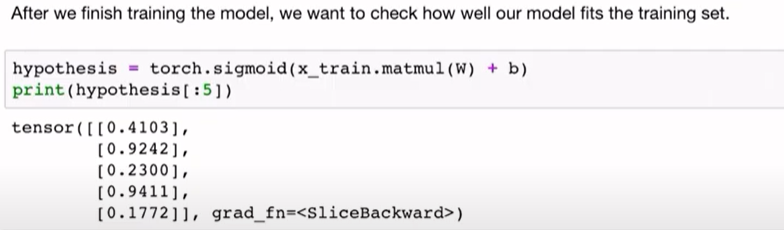

확률을구했으니까 찍어야된다? 그래서 확률이 0.5보다 크면 1이라고 찍는다???

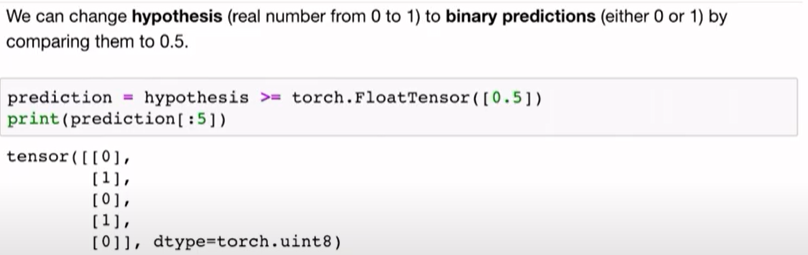

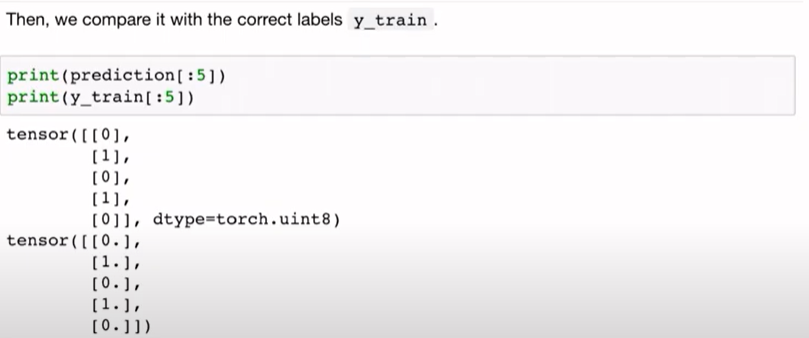

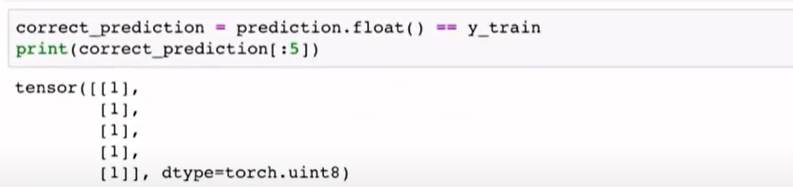

#Higher Implementation with Class

In [17]:
class BinaryClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(8,1)
    self.sigmoid = nn.Sigmoid()

  def forward(self,x):
    return self.sigmoid(self.linear(x))

In [18]:
model = BinaryClassifier()

model.parameters() -> model에있는 W,(self.linear)가 iterator로 들어온다.

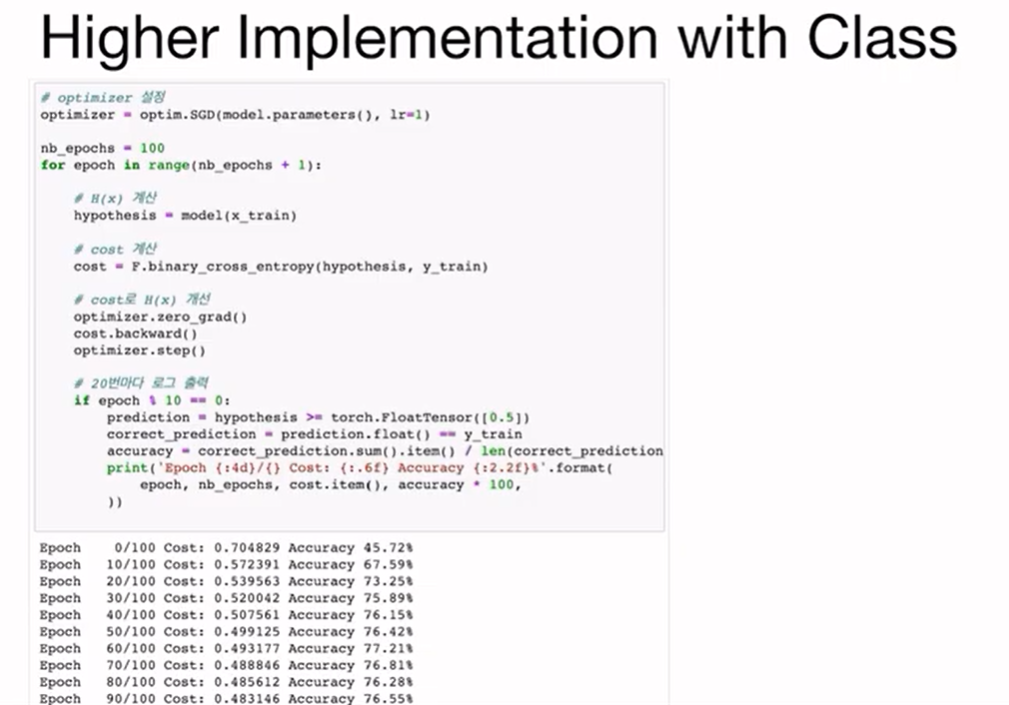